# PROJECT :  Machine learning model of TechWorks Consulting

# Problem Statement:
Create a machine learning model which will help the company in determining the salary of newly
hired employees using the given data.

# Import The Important libraries

In [257]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Data Import From CSVfile

In [3]:
df=pd.read_csv('C:\\Program Files\\python\\ML case Study.csv',header=0)

In [5]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [11]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [17]:
print(df.shape)

(1589, 8)


In [19]:
df_1=pd.read_csv('C:\\Program Files\\python\\Colleges.csv',header=0)

In [21]:
df_1.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [24]:
print(type(df_1))

<class 'pandas.core.frame.DataFrame'>


In [28]:
print(df_1.shape)

(28, 3)


In [30]:
df_2=pd.read_csv('C:\\Program Files\\python\\cities.csv',header=0)

In [32]:
df_2.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [34]:
print(df_2.shape)

(9, 2)


# Process data and converting categorical columns to numerical columns


In [36]:
tier_1_list = df_1['Tier 1'].tolist()
tier_2_list = df_1['Tier 2'].tolist()
tier_3_list = df_1['Tier 3'].tolist()


In [38]:
def map_college_to_tier(college):
    if college in tier_1_list:
        return 3
    elif college in tier_2_list:
        return 2
    elif college in tier_3_list:
        return 1
    else:
        return 0

In [42]:
df['College'] = df['College'].apply(map_college_to_tier)

In [44]:
print(df)

      College             City       Role  Previous CTC  Previous job change  \
0           2          Asansol    Manager       55523.0                    3   
1           2            Ajmer  Executive       57081.0                    1   
2           1  Rajpur Sonarpur  Executive       60347.0                    2   
3           1            Ajmer  Executive       49010.0                    2   
4           3         Durgapur  Executive       57879.0                    4   
...       ...              ...        ...           ...                  ...   
1584        3            Surat  Executive       61285.0                    3   
1585        3  Rajpur Sonarpur  Executive       63140.0                    1   
1586        3        Ahmedabad  Executive       44907.0                    1   
1587        3         Durgapur  Executive       52054.0                    2   
1588        2            Delhi    Manager       44353.0                    3   

      Graduation Marks  EXP (Month)    

In [46]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,1,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,1,Ajmer,Executive,49010.0,2,81,33,82092.39
4,3,Durgapur,Executive,57879.0,4,74,32,73878.10


# count the college value

In [48]:
college_counts = df['College'].value_counts()


In [50]:
print(college_counts)

College
3    578
1    539
2    472
Name: count, dtype: int64


 converting categorical columns to numerical columns


In [54]:
metro_cities = df_2['Metrio City'].tolist()
non_metro_cities = df_2['non-metro cities'].tolist()


In [56]:
def map_city_to_numerical(city):
    if city in metro_cities:
        return 1
    elif city in non_metro_cities:
        return 0
    else:
        return -1

In [58]:
df['City'] = df['City'].apply(map_city_to_numerical)


In [60]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,1,0,Executive,60347.0,2,52,28,76764.02
3,1,0,Executive,49010.0,2,81,33,82092.39
4,3,0,Executive,57879.0,4,74,32,73878.10


In [62]:
city_counts = df['City'].value_counts()

In [64]:
print(city_counts)

City
1    817
0    772
Name: count, dtype: int64


# converting categorical columns to numerical columns

In [66]:
def map_role_to_numerical(role):
    if role == "Manager":
        return 0
    elif role == "Executive":
        return 1
    else:
        return -1 

In [68]:
df['Role'] = df['Role'].apply(map_role_to_numerical)

In [70]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,0,55523.0,3,66,19,71406.58
1,2,0,1,57081.0,1,84,18,68005.87
2,1,0,1,60347.0,2,52,28,76764.02
3,1,0,1,49010.0,2,81,33,82092.39
4,3,0,1,57879.0,4,74,32,73878.10


In [74]:
Role_counts = df['Role'].value_counts()

In [76]:
print(Role_counts)

Role
1    1261
0     328
Name: count, dtype: int64


# NO of missing value


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   int64  
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 99.4 KB


# Variable transformation for previous CTC and CTC

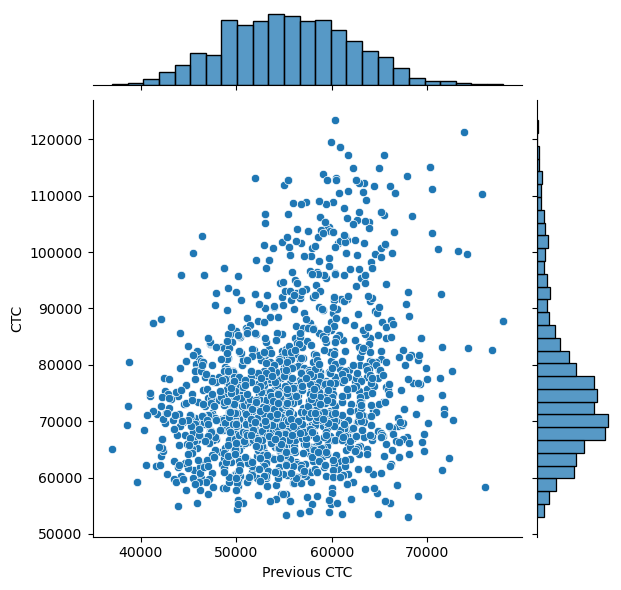

In [90]:
sns.jointplot(x='Previous CTC', y='CTC', data=df)

# Variable transformation for Graduation Marks and CTC

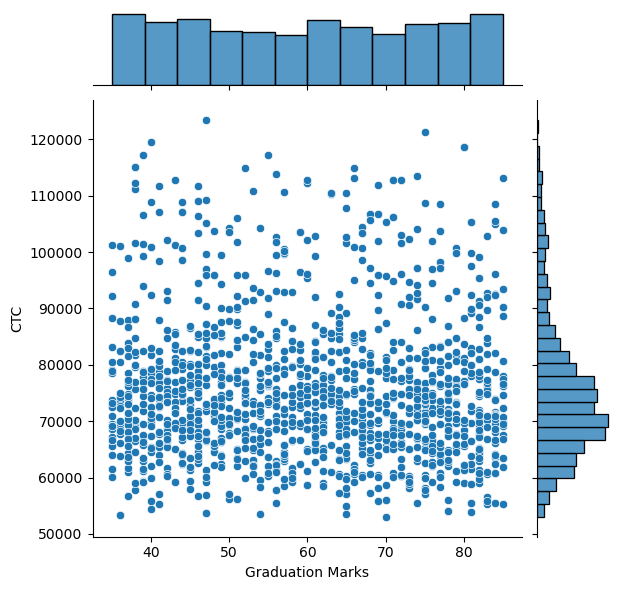

In [92]:
sns.jointplot(x='Graduation Marks', y='CTC', data=df)

# Variable transformation EXP(Month) and CTC

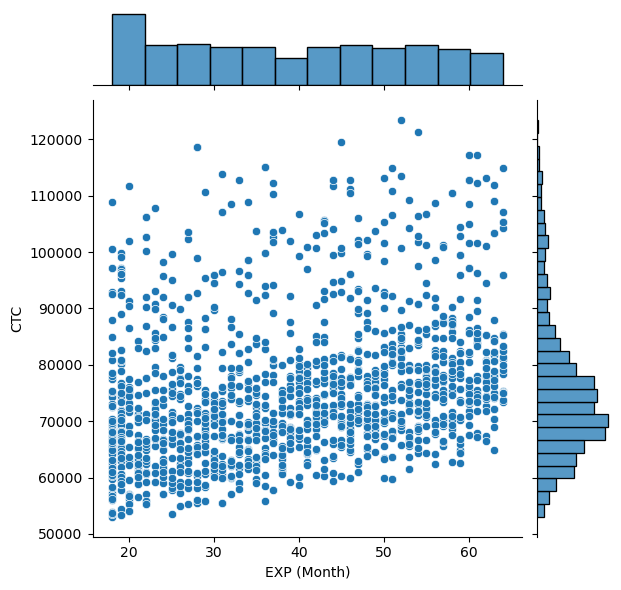

In [94]:
sns.jointplot(x='EXP (Month)', y='CTC', data=df)

# Define cor-relation cofficient

In [287]:
df.corr()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
College,1.000000,0.014946,-0.014749,-0.041979,0.055060,-0.003539,-0.011752,0.029592
City,0.014946,1.000000,0.048671,0.004644,0.051670,-0.018616,-0.023613,-0.020365
Role,-0.014749,0.048671,1.000000,-0.012321,0.017150,-0.017858,0.026751,-0.621311
Previous CTC,-0.041979,0.004644,-0.012321,1.000000,0.005756,-0.032976,0.119163,0.258000
Previous job change,0.055060,0.051670,0.017150,0.005756,1.000000,0.019267,0.023488,0.011370
Graduation Marks,-0.003539,-0.018616,-0.017858,-0.032976,0.019267,1.000000,-0.057061,-0.005450
EXP (Month),-0.011752,-0.023613,0.026751,0.119163,0.023488,-0.057061,1.000000,0.301115
CTC,0.029592,-0.020365,-0.621311,0.258000,0.011370,-0.005450,0.301115,1.000000


# Ordinary linear regession with statsmodel


In [289]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [291]:
import statsmodels.api as sm

In [293]:
x=sm.add_constant(x_train)

In [299]:
lm=sm.OLS(y_train,x).fit()

In [301]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     206.0
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          7.92e-204
Time:                        15:21:23   Log-Likelihood:                -13328.
No. Observations:                1271   AIC:                         2.667e+04
Df Residuals:                    1263   BIC:                         2.671e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.464e+04   2540.540     21.509      0.000    4.97e+04    5.96e+04
College               396.7996    291.573      1.361      0.174    -175.222     968.821
City                  932.4008    489.312      1.906      0.057     -27.553    1892.354
Role                -1.924e+04    602.235    -31.950      0.000   -2.04e+04   -1.81e+04
Previous CTC            0.4289      0.037     11.615      0.000       0.356       0.501
Previous job change    98.2300    218.535      0.449      0.653    -330.502     526.962
Graduation Marks        9.9451     16.391      0.607      0.544     -22.211      42.101
EXP (Month)           257.5920     17.472     14.743      0.000     223.315     291.869
==============================================================================
Omnibus:                       44.386   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.913
Skew:                           0.429   Prob(JB):                     1.45e-11
Kurtosis:                       3.455   Cond. No.                     5.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Multiple Linear Regression

#create dependent and independent variable

In [140]:
x_multi=df.drop("CTC",axis=1)

In [142]:
y_multi=df["CTC"]

add constant variable

In [144]:
x_multi_cons=sm.add_constant(x_multi)

In [148]:
x_multi_cons.head()

,const,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month)
0,1.0,2,0,0,55523.0,3,66,19
1,1.0,2,0,1,57081.0,1,84,18
2,1.0,1,0,1,60347.0,2,52,28
3,1.0,1,0,1,49010.0,2,81,33
4,1.0,3,0,1,57879.0,4,74,32


now fit our model

In [152]:
lm_multi=sm.OLS(y_multi,x_multi_cons).fit()

In [154]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          4.70e-257
Time:                        12:43:56   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.598e+04   2262.941     24.739      0.000    5.15e+04    6.04e+04
College               481.5147    258.382      1.864      0.063     -25.292     988.321
City                  380.8308    433.455      0.879      0.380    -469.377    1231.039
Role                -1.949e+04    534.694    -36.446      0.000   -2.05e+04   -1.84e+04
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
lm3=LinearRegression()

In [158]:
lm3.fit(x_multi,y_multi)

LinearRegression()

In [162]:
print(lm3.intercept_,lm3.coef_)

55982.47884349906 [ 4.81514705e+02  3.80830787e+02 -1.94874279e+04  4.10090279e-01
  1.26565295e+02  6.23621203e+00  2.61344394e+02]


In [178]:
y_pred= lm3.predict(x_test)

In [192]:
y_train_pred=lm3.predict(x_train)

# TEST_TRAIN SPLIT 

In [176]:
#FRIST IMPORT THE MODEL
from sklearn.model_selection import train_test_split

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x_multi,y_multi,test_size=0.2 ,random_state=0)     #use random state =0 for same set)

In [172]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


now predicted value

In [180]:
X_new = pd.DataFrame({'Orignal_value': y_test, 'Assume_value': y_pred})

In [182]:
print(X_new.head())

      Orignal_value  Assume_value
900        67487.61  69738.842732
427        72477.67  63954.882735
219        75535.50  63167.561222
1101       82986.23  72019.312037
748        73093.09  76830.120125


#        Now check r^2 value FRO ACCURACY OF MODEL

In [186]:
from sklearn.metrics import r2_score

In [200]:
r2_score(y_pred,y_test)

0.09844702788628668

r2_score for training set

In [194]:
r2_score(y_train,y_train_pred)

0.5324172612795327

mean square error calculate

In [204]:
from sklearn.metrics import mean_squared_error

In [206]:
mse = mean_squared_error(y_test, y_pred)

In [208]:
print(mse)

67883610.23613317


# lasso regression


In [308]:
from sklearn.linear_model import Lasso
lm4 = (Lasso(alpha=1.0))

In [310]:
lm4.fit(x_train,y_train)

Lasso()

In [312]:
y_pred = lm4.predict(x_test)

In [314]:
y_pred_train = lm4.predict(x_train)

#mean square error and r2score 

In [316]:
mean_squared_error(y_test,y_pred)

68908037.77538098

In [318]:
r2_score(y_train,y_pred_train)


0.5331292572808058

# Decision tree regression

In [320]:
from sklearn import tree

In [326]:
regtree_1 = tree.DecisionTreeRegressor(max_depth = 3)

In [328]:
#fit the value
regtree_1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [334]:
# Predict values using trained model
y_train_pred =regtree_1.predict(x_train)
y_test_pred =regtree_1.predict(x_test)

In [338]:
#see the value of y_test_pred
y_test_pred

array([ 73242.49487805,  67137.92249315,  67137.92249315,  77249.90582677,
        73242.49487805,  87264.44514286,  70080.03361607,  73242.49487805,
        67137.92249315,  73242.49487805,  70080.03361607,  77249.90582677,
        95311.75026316,  77249.90582677,  73242.49487805, 104985.9661039 ,
        67137.92249315,  67137.92249315,  67137.92249315,  77249.90582677,
       104985.9661039 , 104985.9661039 ,  67137.92249315,  67137.92249315,
        70080.03361607,  67137.92249315,  77249.90582677, 104985.9661039 ,
        77249.90582677,  73242.49487805,  67137.92249315,  67137.92249315,
        77180.13443038,  77249.90582677, 104985.9661039 ,  77249.90582677,
        67137.92249315,  77180.13443038,  67137.92249315,  67137.92249315,
        67137.92249315,  77180.13443038,  73242.49487805,  67137.92249315,
        77249.90582677,  70080.03361607,  77180.13443038,  67137.92249315,
        67137.92249315,  73242.49487805,  95311.75026316,  77249.90582677,
       104985.9661039 ,  

Evaluating the model with help of mean_squared_error and r2_score

In [340]:
mean_squared_error(y_test,y_test_pred)

60424631.02613475

In [342]:
r2_score(y_train,y_train_pred)

0.6137194061789908

In [346]:
r2_score(y_test,y_test_pred)

0.5927831611924911

##     Question


#     1. Your views about problem statements?¶

 The problem statement involves predicting the CTC (Cost to Company) of employees based on several features: college tier, previous CTC, graduation marks, experience, and role (Manager or Executive).The experience of the employess and the pervious CTC help to predict the CTC the current CTC . So we use the different type of model  is a classic  to find outt a continuous output (CTC) based on a data set which is provided by the above.

# 2.What will be your approach to solving this task?

To solve the task i read the given task carefully . In the given task provide the three csv file (ML cse study ,colleges,cities). frist i import the all important  libraries like pandas ,sesborn , mataplot.lib ,sklearn ...etc. with the help of these libraries it is easy to perform the task . After this import all the csv file with help of pandas library . Futher step includes data converting into numerical columns, preprocessing, exploratory data analysis, model training, evaluation, and accuracy.

# 3. What were the available ML model options you had to perform this task?¶


1 - Statsmodel (OLS)
2 - Linear Regression
3Multiple liner  Regressionion
4 - Lasso Regres
5 - Decision tree regression
 LightGBM¶

# 4. Which model’s performance is best and what could be the possible reason for that?¶

I found the best model to perform the task is Decision Tree Regreesion model.I used other model to perform the task but the accuracy is low but in Decision Tree Regression model the accuray is 61%. this the reason to select this model to perform the task. The biggest advantage of this model is it  findout  non-linear relationships; easy to interpret

# 5. What steps can you take to improve this selected model’s performance even further?

To improve the performance of the selected model, we can undertake various steps, focus on data preprocessing, feature selection (lasso regression,treebased feature), model selection and evaluation_matrics(mean_squared_error,r2_score). 


# Thank you